In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#importing the Dataset 
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


In [3]:
#Preprocessing the data
x_train = x_train/255
x_test =  x_test/255

x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1)


In [4]:
# one hot encoding the categorical features 
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)


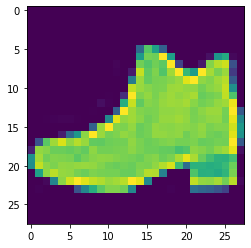

In [5]:
# sample image from train set
plt.imshow(x_train[15].reshape(28,28))

In [10]:
#creating the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [11]:
#Fitting the CNN model to the train set 
model.fit(x=x_train,y=y_cat_train,epochs=20,verbose=1)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 53s 885us/sample - loss: 0.3643 - accuracy: 0.8685
Epoch 2/20
60000/60000 [==============================] - 52s 861us/sample - loss: 0.2327 - accuracy: 0.9143
Epoch 3/20
60000/60000 [==============================] - 52s 872us/sample - loss: 0.1820 - accuracy: 0.9330
Epoch 4/20
60000/60000 [==============================] - 52s 862us/sample - loss: 0.1404 - accuracy: 0.9484
Epoch 5/20
60000/60000 [==============================] - 50s 839us/sample - loss: 0.1029 - accuracy: 0.9613
Epoch 6/20
60000/60000 [==============================] - 51s 847us/sample - loss: 0.0764 - accuracy: 0.9720
Epoch 7/20
60000/60000 [==============================] - 51s 848us/sample - loss: 0.0557 - accuracy: 0.9790
Epoch 8/20
60000/60000 [==============================] - 51s 847us/sample - loss: 0.0438 - accuracy: 0.9844
Epoch 9/20
60000/60000 [==============================] - 50s 841us/sample - loss: 0.0349 - accuracy: 0.9

In [13]:
results = pd.DataFrame(model.history.history)
results


,loss,accuracy
0,0.364279,0.868467
1,0.232744,0.914250
2,0.181962,0.933033
3,0.140448,0.948367
4,0.102857,0.961317
5,0.076387,0.971983
6,0.055748,0.978950
7,0.043795,0.984400
8,0.034870,0.986833
9,0.028355,0.989717


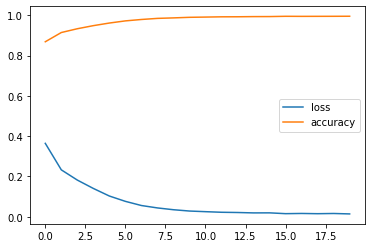

In [15]:
results.plot()


In [16]:
#Making prediction on x_test and storing the predictions and true values in a csv file 
predictions = model.predict_classes(x_test)

true_values = list(y_test)
predictions = list(predictions)
sub = pd.DataFrame({'True Values': true_values, 'Predictions': predictions})
sub.to_csv('./Predictions_VS_True-Values_MNIST.csv', index=False)

In [19]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,predcictions)
con_mat

array([[862,   1,  23,   8,   3,   1,  99,   0,   3,   0],
       [  4, 983,   0,   7,   2,   0,   1,   1,   2,   0],
       [ 21,   1, 888,   7,  36,   0,  45,   0,   2,   0],
       [ 28,   4,  12, 897,  33,   0,  20,   0,   3,   3],
       [  5,   1,  60,  17, 870,   0,  46,   0,   1,   0],
       [  0,   0,   0,   0,   0, 985,   0,  11,   0,   4],
       [ 93,   1,  43,  16,  65,   0, 774,   0,   8,   0],
       [  0,   0,   0,   0,   0,   4,   0, 985,   0,  11],
       [  5,   2,   1,   4,   3,   2,   2,   2, 977,   2],
       [  0,   0,   1,   0,   0,   5,   0,  32,   1, 961]], dtype=int64)